# Galaxy Images!

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from ltpix import AstroImage, web_images, display_image

In astronomy we use images to study objects in space like planets, stars, and galaxies. We take the images with cameras a lot like the one in your iphone, except first we attach them to big telescopes on mountaintops. To get above Earth's atmosphere, which blurs astronomical images and absorbs most of the [electromagnetic spectrum](https://en.wikipedia.org/wiki/Electromagnetic_spectrum), we attach our cameras to bus-size satellites like the [Hubble Space Telescope](https://en.wikipedia.org/wiki/Hubble_Space_Telescope) and launch them into space.

*Question*: Why do astronomers like putting telescopes in space? *Hint:* Check out the image below!

![atmospheric-opacity](https://upload.wikimedia.org/wikipedia/commons/3/34/Atmospheric_electromagnetic_opacity.svg)

In this notebook we will learn how to interact with **real galaxy images**. The images in this activity were taken with the Hyper Surpime-Cam (HSC) on the 8.2 meter [Subaru telescope](https://www.nao.ac.jp/en/research/telescope/subaru.html) on Mauna Kea in Hawaii. These images are among the best ground-based imaging data in the world.

## Section 1: Displaying real galaxy images
`AstroImage` is a tool that will help us view and interact with galaxy images. We have 5 different galaxies to look at. The goal in this section is to display all the galaxies in the notebook and observe/discuss differences in the images.

Create an `AstroImage` object for one of the galaxies by  pushing `shift + enter` in the next cell. 

In [2]:
# Enter the galaxy number (1, 2, 3, or 4) into 
# the parenthese like this AstroImage(<galaxy number>)
galaxy = AstroImage(2) 

INFO: Successfully loaded galaxy number 2!


For each galaxy, we have HSC images taken with red, green, and blue filters on the camera. 

You can access the raw data for one of the filters using `galaxy.red_data` (similar functions are available for the other filters).

Remember, images are just arrays of numbers. Let's look at a small section of array of the red image using *indexing*:

In [3]:
galaxy.red_data[:5, :5]

array([[-0.08150312,  0.00434876,  0.03118798, -0.05528592,  0.02607285],
       [-0.03122015,  0.00167757, -0.00236008,  0.01492778, -0.01911279],
       [-0.07913607,  0.08225357,  0.06579419,  0.02863678,  0.00142118],
       [ 0.00846095,  0.06315193,  0.0604121 , -0.02390118,  0.0101778 ],
       [ 0.03010739, -0.02995416,  0.09347904, -0.04186856, -0.07210999]],
      dtype=float32)

### Group Questions
- Is it strange that some of the numbers are negative?
- Why or why not?

To display a single-band image, use `galaxy.display_single_band_image(<insert color here>)`. Give it a try!

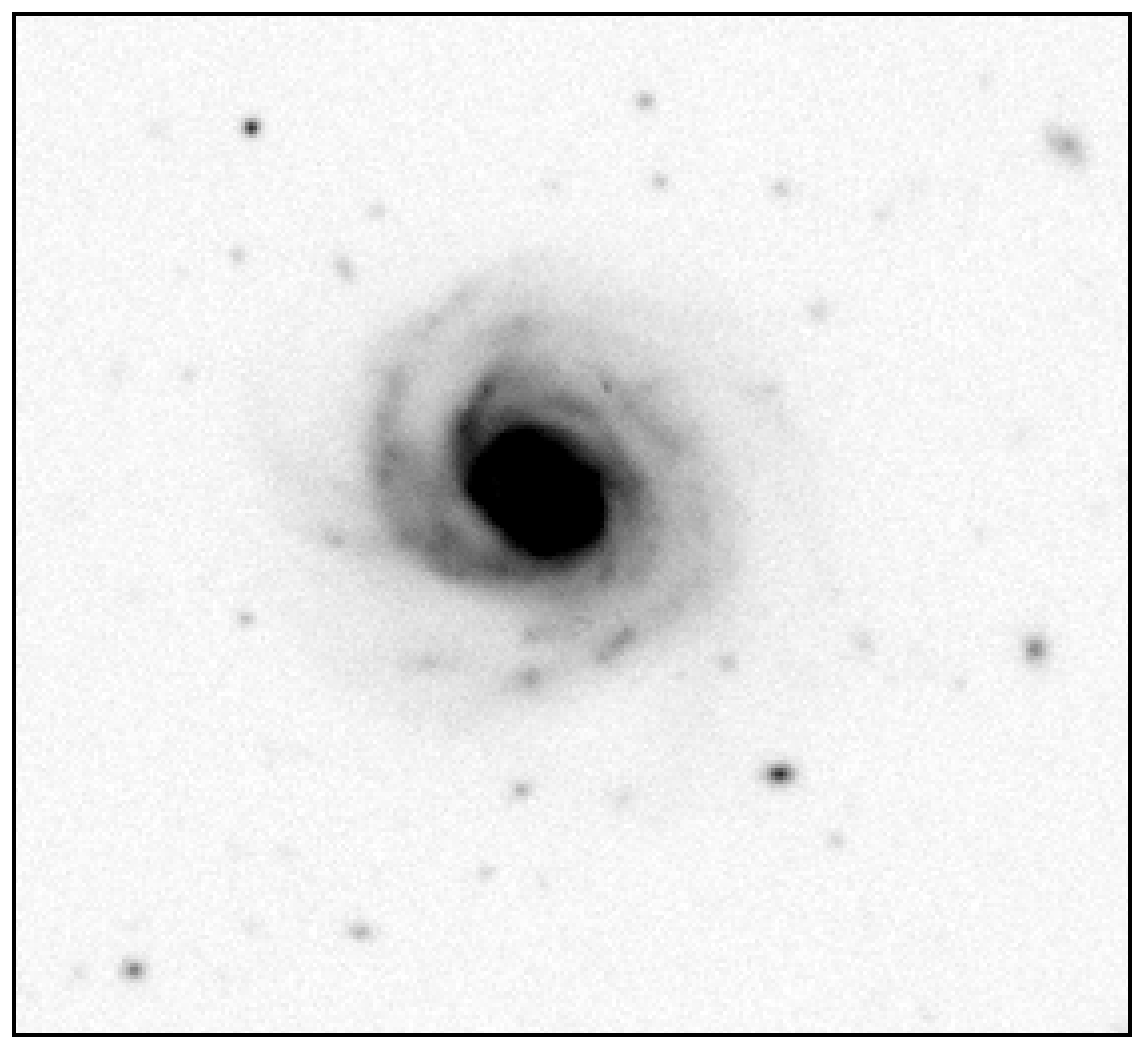

In [4]:
galaxy.display_single_band_image('red') # enter the color into the function (red, green, or blue)

Are there any regions in the image that look washed out and totally black? These pixels are saturated due to the image display settings.

You can change the range of gray tones in the image using the `percentiles` parameter, which specifies the minimum and maximum intensity values that can be display in the image. For an explanation of percentiles, see [Math is Fun](https://www.mathsisfun.com/data/percentiles.html).

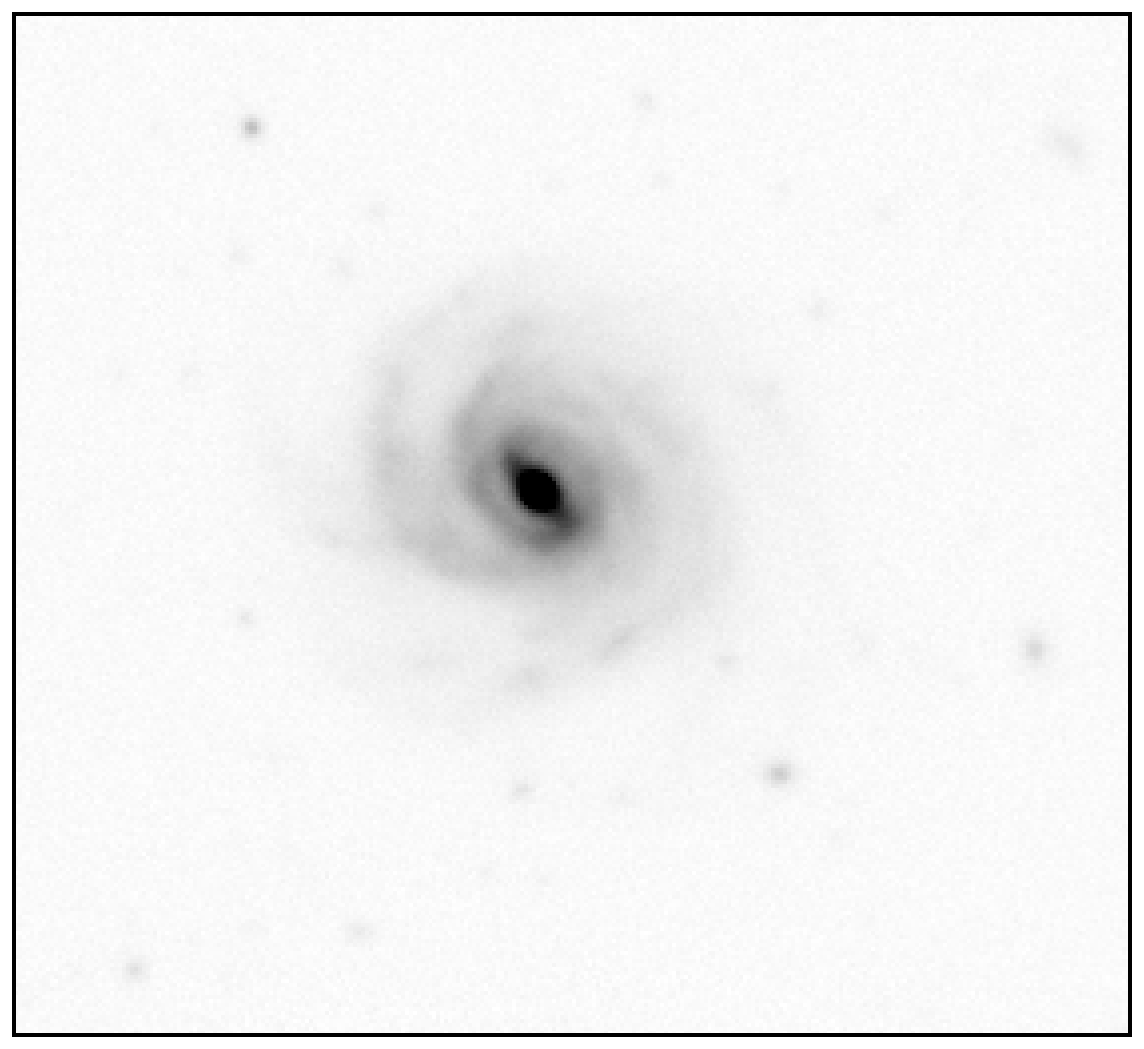

In [5]:
galaxy.display_single_band_image('green', percentiles=[0.1, 99.9]) 

### Group Questions
- Do the different color images look *exactly* the same? 
- If not, how are they different? 

Just like with the cute animal images from the previous notebook, we can combine these data to create color images of the galaxies. `AstroImage` can display the color image like this: `galaxy.display_rgb_image()`.

Try it!

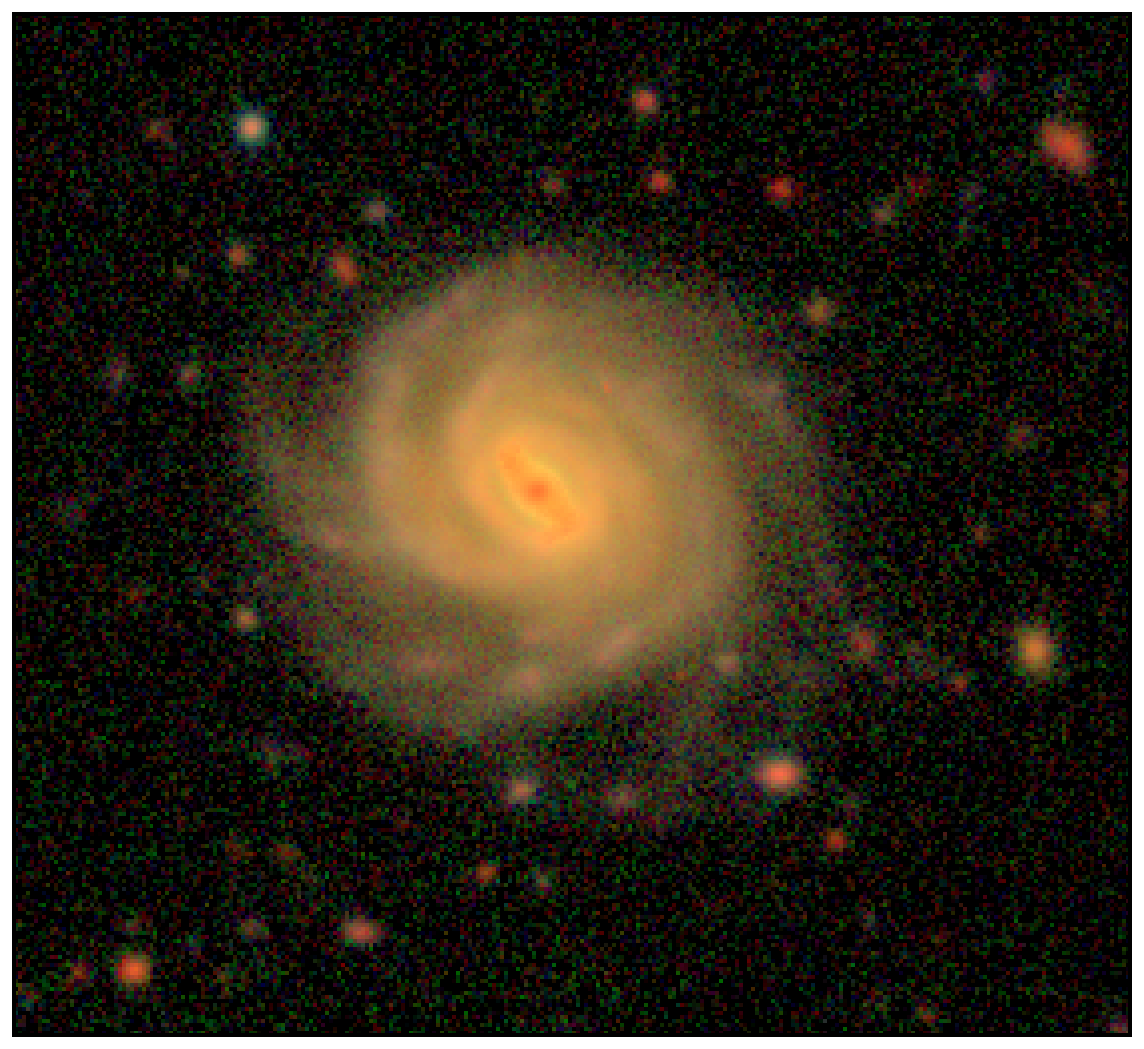

In [6]:
galaxy.display_rgb_image()

### Group Questions
- What do you notice in the color image that wasn't obvious from the single-band images? 

## Section 2: Interactive pixel fun with JS9

For our main activity later today, we will need to get pixel coordinates from our galaxy images. We will do this with `JS9`, which you can start by going here: [love-thy-pixels-JS9](https://johnnygreco.space).

Following the steps shown on the projector, draw a box on the image (in `JS9`) and find the pixel coordinates, width, and height and display the image in this notebook using the code below.

Try to display many different regions! Also, try to display data from red, green, and, blue filters.

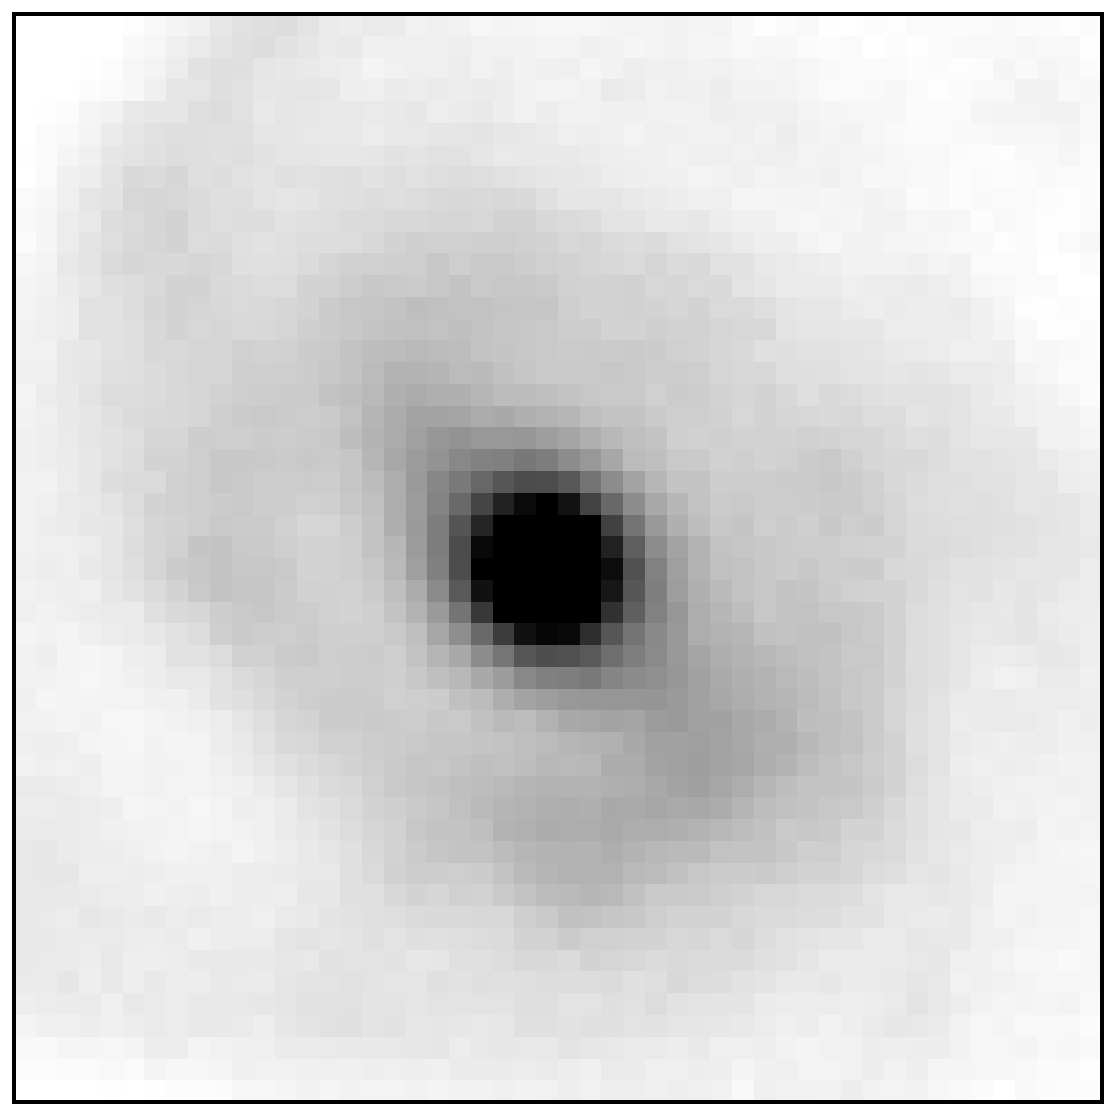

In [7]:
# center coordinates of subimage
# round to an integer (no decimal point)
x_center = 132 
y_center = 137

# round to an integer (no decimal point)
width = 50
height = 50

# note that y --> rows, x --> columns
subimage = galaxy.blue_data[y_center - height//2: y_center + width//2,
                            x_center - height//2: x_center + width//2]

display_image(subimage);

## Bonus Section: How big is a galaxy?

In astronomy, we can't measure the sizes of objects in space using light-year scale measuring tape. But fear not... **MATH** to the rescue! If we know the distance to an object in space (which is generally **REEEEEEEEEEALLY** hard to measure, but we can do it!), we can use [trigonometry](https://en.wikipedia.org/wiki/Trigonometry) to measure its size!

![angular-diameter](https://upload.wikimedia.org/wikipedia/commons/e/ed/Angular_diameter.jpg)

If the angular radius of an object is $\theta$ in radians (1 radian = $180/\pi$ = 57.3 degrees), and the object is a distance $D$ from Earth, then its physical radius is

$$
r = D\cdot\theta
$$

Note this is only true when $\theta$ is a small angle, which is almost always the case in astronomy. Indeed, all of the angles you will be measuring in this activity are best expressed in units of arcsecond (denoted as $^{\prime\prime}$), and $1^{\prime\prime} = 1/3600$ degrees!

The next cell has two functions to help you calculate the galaxy's physical radius. Follow these steps:
- Use `JS9` to measure the angular radius of the galaxy in units of pixels. 
- Convert the radius to degrees using `radius_pixel_to_degree(<measured radius in pixels>)`
- Measure the physical size of the galaxy using `measure_size(<measured radius in degrees>, <distance to galaxy>)`. You can get the distance to the galaxy in light years using `galaxy.distance_lyr`.

In [8]:
def radius_pixel_to_degree(radius_in_pix):
    radius_in_degree = radius_in_pix * 0.168 / 3600.0
    print("The galaxy's radius is {:.8f} degrees".format(radius_in_degree))
    return radius_in_degree

def measure_size(radius_in_degree, distance_in_light_years):
    radius_in_radian = radius_in_degree * np.pi / 180 # this converts degree to radian
    radius_in_light_years = distance_in_light_years * radius_in_radian
    print("The galaxy's radius is {:.2f} light years!".format(radius_in_light_years))
    return radius_in_light_years

In [9]:
radius_in_degree = radius_pixel_to_degree(80)

The galaxy's radius is 0.00373333 degrees


In [10]:
radius = measure_size(radius_in_degree, galaxy.distance_lyr)

The galaxy's radius is 121556.50 light years!


### Group Questions
- How big is the galaxy on the sky in degrees? 
- How big is the full moon on the sky in degrees?
- What is the diameter of the galaxy in light years?
- How long would it take a spaceship moving at half the speed of light to travel from one end of the galaxy to the other? 